In [15]:
!nvidia-smi

Mon Nov 30 14:32:30 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.80.02    Driver Version: 450.80.02    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:1E.0 Off |                    0 |
| N/A   46C    P0    27W /  70W |   6722MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [16]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
from mtcnn import MTCNN

plt.style.use('dark_background')

In [17]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # 특정 GPU에 1GB 메모리만 할당하도록 제한
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=6000)])
    except RuntimeError as e:
    # 프로그램 시작시에 가상 장치가 설정되어야만 합니다
        print(e)

# Load Models

In [18]:
# facenet = cv2.dnn.readNet('models/deploy.prototxt', 'models/res10_300x300_ssd_iter_140000.caffemodel')
with tf.device('/device:GPU:0'):

    model = load_model('/home/lab07/Model_predict/test_mask_model_Densenet201.h5')
    

# Crop Image

In [35]:
def make_crop_img(image_file, detector):
    result = detector.detect_faces(image_file)
    if result == []:
        print('No information')
        return []
    else:
        bounding_box = result[0]['box']
        
        for a in range(4):
            if bounding_box[a] < 0:
                bounding_box[a] = 0
                
        resizeImageNDArray = image_file.copy()
        bounding_box[1] = int(bounding_box[1]*0.8)
        bounding_box[0] = int(bounding_box[0]*0.8)
        bounding_box[3] = int(bounding_box[3]*1.2)
        bounding_box[2] = int(bounding_box[2]*1.2)
        resizeImageNDArray = image_file[bounding_box[1]:bounding_box[1]+bounding_box[3], bounding_box[0]:bounding_box[0]+bounding_box[2]]
        resizeImageNDArray = cv2.resize(resizeImageNDArray, (224, 224), interpolation = cv2.INTER_CUBIC)
        return resizeImageNDArray

detector = MTCNN()

# Detect Face

In [20]:
white = '/home/lab07/MASKDETECTION/imgs/white.jpg'
black_nose = '/home/lab07/MASKDETECTION/imgs/black_nose.jpg'
white_nose_lips = '/home/lab07/MASKDETECTION/imgs/white_nose_lips.jpg'
black_nose_lips = '/home/lab07/MASKDETECTION/imgs/black_nose_lips.jpg'
black = '/home/lab07/MASKDETECTION/imgs/black.jpg'
black_chin = '/home/lab07/MASKDETECTION/imgs/black_chin.jpg'
white_nose = '/home/lab07/MASKDETECTION/imgs/white_nose.jpg'


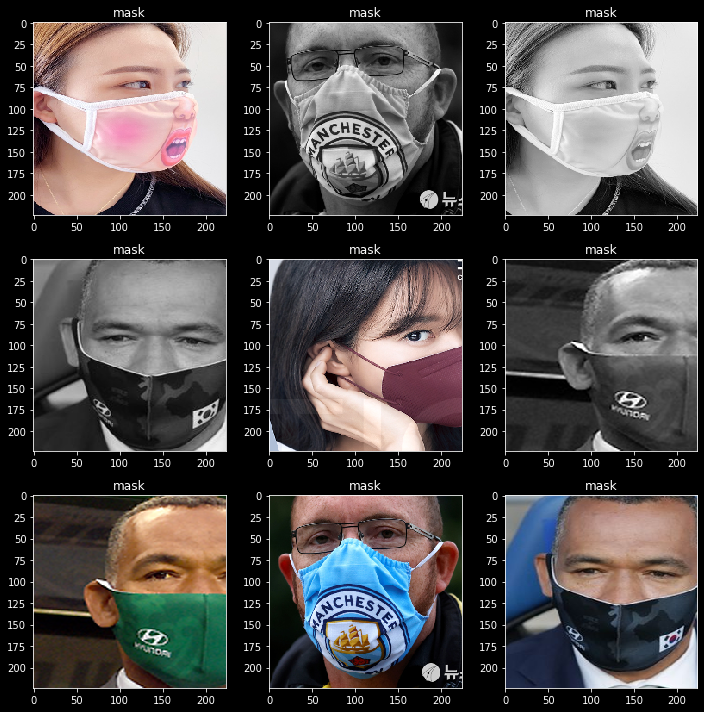

In [45]:
import glob
############################################ 기존 전이학습 ###############################################
with tf.device('/device:GPU:0'):

    path = glob.glob('./test/*.jpg')

    fig1 = plt.figure(figsize=(10,10))
    axs1 = [] # subplot을 저장하는 리스트

    for i in range(len(path)):
            axs1.append(fig1.add_subplot(3,3,i+1))

    for idx, j in enumerate(path):
        images = cv2.cvtColor(cv2.imread(j), cv2.COLOR_BGR2RGB) 
        images = make_crop_img(images, detector)

        face_input = cv2.resize(images, dsize=(224, 224))
        axs1[idx].imshow(images)
        face_input = cv2.cvtColor(face_input, cv2.COLOR_BGR2RGB)
        face_input = preprocess_input(face_input)
        face_input = np.expand_dims(face_input, axis=0)

        mask1 = model.predict(face_input)
        
        if mask1 > 0.5:
            axs1[idx].set_title('no mask')
        else:
            axs1[idx].set_title('mask')
        
#         axs1[idx].set_title(np.float16(mask1))

    fig1.tight_layout()
    plt.show()

No information


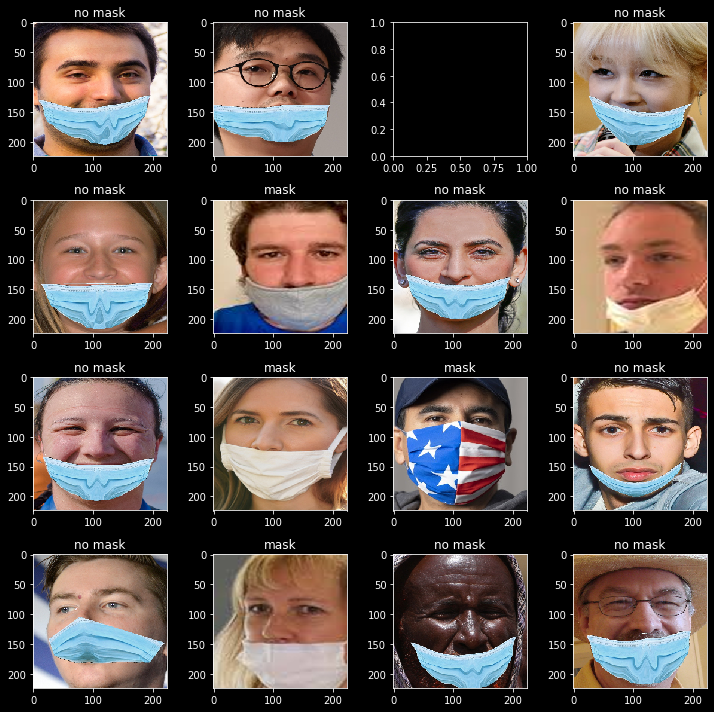

In [47]:
import glob
############################################ 기존 전이학습 ###############################################
with tf.device('/device:GPU:0'):

    path = glob.glob('./testset/wrong_mask/*.jpg')

    fig1 = plt.figure(figsize=(10,10))
    axs1 = [] # subplot을 저장하는 리스트

    for i in range(len(path)):
        axs1.append(fig1.add_subplot(4,4,i+1))
        
            

    for idx, j in enumerate(path):
        try:
            images = cv2.cvtColor(cv2.imread(j), cv2.COLOR_BGR2RGB) 
            images = make_crop_img(images, detector)
        
            face_input = cv2.resize(images, dsize=(224, 224))
            axs1[idx].imshow(images)
            face_input = cv2.cvtColor(face_input, cv2.COLOR_BGR2RGB)
            face_input = preprocess_input(face_input)
            face_input = np.expand_dims(face_input, axis=0)

            mask1 = model.predict(face_input)
        
            if mask1 > 0.5:
                axs1[idx].set_title('no mask')
            else:
                axs1[idx].set_title('mask')
        
        except:
            pass

    fig1.tight_layout()
    plt.show()

[[0.01129]]
[[0.]]
No information
No information
No information


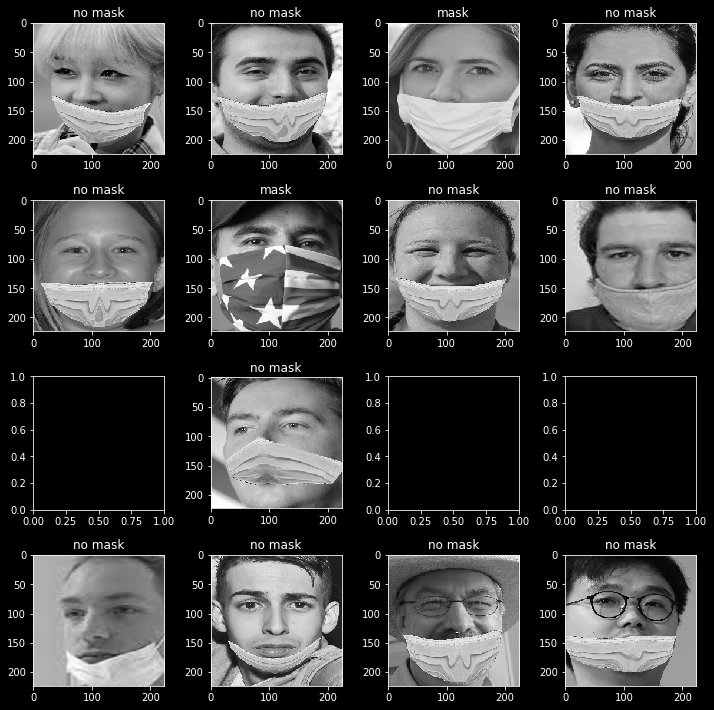

In [49]:
import glob
############################################ 기존 전이학습 ###############################################
with tf.device('/device:GPU:0'):

    path = glob.glob('./testset/wrong_mask_gray/*.jpg')

    fig1 = plt.figure(figsize=(10,10))
    axs1 = [] # subplot을 저장하는 리스트

    for i in range(len(path)):
        axs1.append(fig1.add_subplot(4,4,i+1))
        
            

    for idx, j in enumerate(path):
        try:
            images = cv2.cvtColor(cv2.imread(j), cv2.COLOR_BGR2RGB) 
            images = make_crop_img(images, detector)
        
            face_input = cv2.resize(images, dsize=(224, 224))
            axs1[idx].imshow(images)
            face_input = cv2.cvtColor(face_input, cv2.COLOR_BGR2RGB)
            face_input = preprocess_input(face_input)
            face_input = np.expand_dims(face_input, axis=0)

            mask1 = model.predict(face_input)
        
            if mask1 > 0.5:
                axs1[idx].set_title('no mask')
            else:
                axs1[idx].set_title('mask')
                print(np.float16(mask1))
        
        except:
            pass

    fig1.tight_layout()
    plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
No information
err


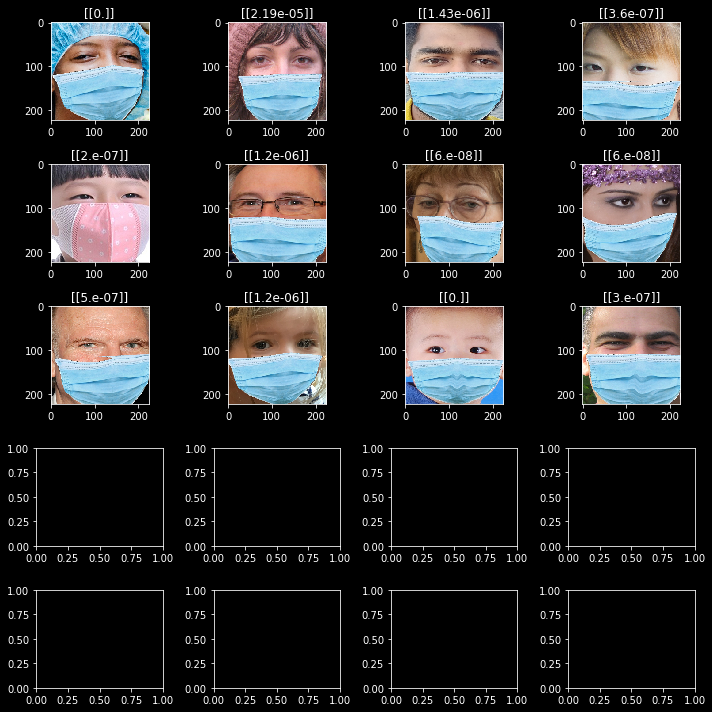

In [8]:
import glob
############################################ 기존 전이학습 ###############################################
with tf.device('/device:GPU:0'):

    path = glob.glob('./with_mask_sum/*.jpg')

    fig1 = plt.figure(figsize=(10,10))
    axs1 = [] # subplot을 저장하는 리스트

    for i in range(20):
            axs1.append(fig1.add_subplot(5,4,i+1))

    for idx, j in enumerate(path):
        try:
            images = cv2.cvtColor(cv2.imread(j), cv2.COLOR_BGR2RGB) 
            images = make_crop_img(images, detector)

            face_input = cv2.resize(images, dsize=(224, 224))
            axs1[idx].imshow(images)
            face_input = cv2.cvtColor(face_input, cv2.COLOR_BGR2RGB)
            face_input = preprocess_input(face_input)
            face_input = np.expand_dims(face_input, axis=0)

            mask1 = model.predict(face_input)
            axs1[idx].set_title(np.float16(mask1))
            print(idx)
            
         
        except:
            print('err')
            break

    fig1.tight_layout()
    plt.show()

# Detect Masks test

## 1. 흰색 마스크

DenseNet201 : [[2.6837806e-06]]


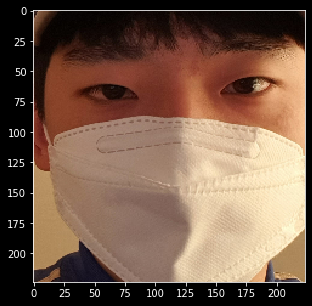

In [9]:
with tf.device('/device:GPU:0'):   
    path = '/home/lab07/MASKDETECTION/imgs/KakaoTalk_20201125_194935556.jpg'

    images = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) 
    images = make_crop_img(images, detector)

    plt.figure(figsize=(16, 5))

    face_input = cv2.resize(images, dsize=(224, 224))
    plt.imshow(face_input)
    
    face_input = cv2.cvtColor(face_input, cv2.COLOR_BGR2RGB)    
    face_input = preprocess_input(face_input)
    face_input = np.expand_dims(face_input, axis=0)

    mask1 = model.predict(face_input)
    
    print('DenseNet201 : {}'.format(mask1))
   

DenseNet201 : [[0.9500556]]


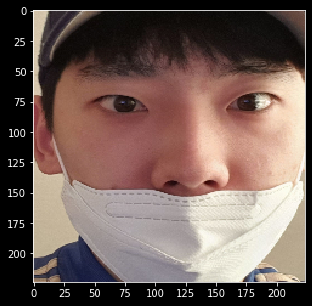

In [10]:
with tf.device('/device:GPU:0'):
    path = '/home/lab07/MASKDETECTION/imgs/KakaoTalk_20201125_195020019.jpg'

    images = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) 
    images = make_crop_img(images, detector)

    plt.figure(figsize=(16, 5))

    face_input = cv2.resize(images, dsize=(224, 224))
    plt.imshow(face_input)
    
    face_input = cv2.cvtColor(face_input, cv2.COLOR_BGR2RGB)    
    face_input = preprocess_input(face_input)
    face_input = np.expand_dims(face_input, axis=0)

    mask1 = model.predict(face_input)
    
    print('DenseNet201 : {}'.format(mask1))
   

DenseNet201 : [[1.]]


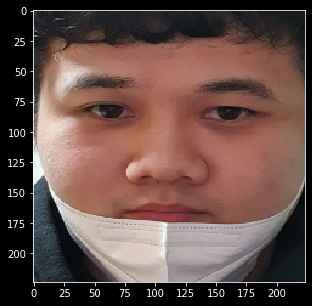

In [11]:
with tf.device('/device:GPU:0'):
    path = white_nose
    images = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) 
    images = make_crop_img(images, detector)

    plt.figure(figsize=(16, 5))

    face_input = cv2.resize(images, dsize=(224, 224))
    plt.imshow(face_input)
    
    face_input = cv2.cvtColor(face_input, cv2.COLOR_BGR2RGB)    
    face_input = preprocess_input(face_input)
    face_input = np.expand_dims(face_input, axis=0)

    mask1 = model.predict(face_input)
    
    print('DenseNet201 : {}'.format(mask1))
   

## 3. 검은색 마스크

DenseNet201 : [[1.9981918e-07]]


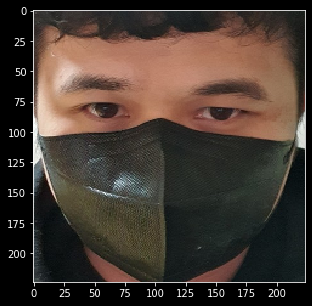

In [12]:
with tf.device('/device:GPU:0'):
    path = black
    images = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) 
    images = make_crop_img(images, detector)

    plt.figure(figsize=(16, 5))

    face_input = cv2.resize(images, dsize=(224, 224))
    plt.imshow(face_input)
    
    face_input = cv2.cvtColor(face_input, cv2.COLOR_BGR2RGB)    
    face_input = preprocess_input(face_input)
    face_input = np.expand_dims(face_input, axis=0)

    mask1 = model.predict(face_input)
    
    print('DenseNet201 : {}'.format(mask1))
   

DenseNet201 : [[0.9923591]]


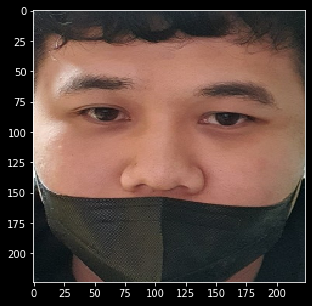

In [13]:
with tf.device('/device:GPU:0'):
    path = black_nose
#     model5 = load_model('/home/lab07/Model_predict/test_no_pretrained.h5')
    images = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) 
    images = make_crop_img(images, detector)

    plt.figure(figsize=(16, 5))

    face_input = cv2.resize(images, dsize=(224, 224))
    plt.imshow(face_input)
    
    face_input = cv2.cvtColor(face_input, cv2.COLOR_BGR2RGB)    
    face_input = preprocess_input(face_input)
    face_input = np.expand_dims(face_input, axis=0)

    mask1 = model.predict(face_input)
    
    print('DenseNet201 : {}'.format(mask1))
   

DenseNet201 : [[0.999961]]


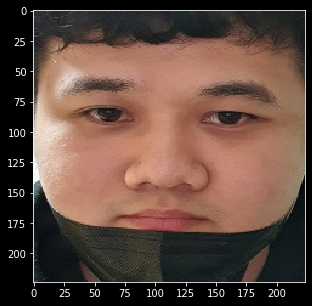

In [14]:
with tf.device('/device:GPU:0'):
    
    path = black_nose_lips
    images = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) 
    images = make_crop_img(images, detector)

    plt.figure(figsize=(16, 5))

    face_input = cv2.resize(images, dsize=(224, 224))
    plt.imshow(face_input)
    
    face_input = cv2.cvtColor(face_input, cv2.COLOR_BGR2RGB)    
    face_input = preprocess_input(face_input)
    face_input = np.expand_dims(face_input, axis=0)

    mask1 = model.predict(face_input)
    
    print('DenseNet201 : {}'.format(mask1))
   